# Physics Lab

The following problem was created by Soviet Socialist Solutions to exemplify the magic of Python.

Suppose you have some kind of Coulombic interaction that can be modeled by the following equation: 
                \begin{align} {F} &= \frac{1}{r^3} \end{align}
You're supposed to plot the experimental data collected during the experiment and then determine a best-fit. But wait! you've lost your data, or worse you forgot to go to lab that day. No worries, the random number generator has your back. Let's start off by generating our own experimental data using numpy.

In [1]:
import numpy as np
exp_x = np.linspace(3,5,10)
exp_x = np.round(exp_x,2)
exp_F = 1/exp_x**3
exp_F = np.round(exp_F,4)
print('Our experimental data is as follows:')
for index in range(len(exp_x)):
    print('{}    {}'.format(exp_x[index], exp_F[index]))

Our experimental data is as follows:
3.0    0.037
3.22    0.03
3.44    0.0246
3.67    0.0202
3.89    0.017
4.11    0.0144
4.33    0.0123
4.56    0.0105
4.78    0.0092
5.0    0.008


Now, let's plot it using matplotlib.

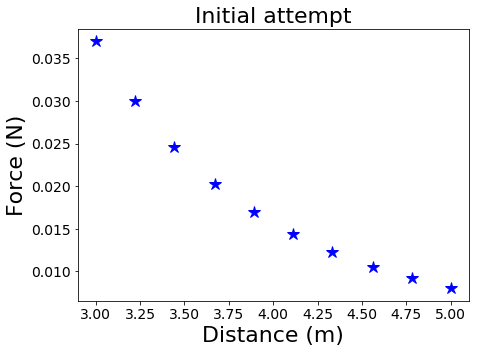

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

def my_fun_plot_function(title=''):
    font_prop = font_manager.FontProperties(size = 22)
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(exp_x, exp_F, 'b*', markersize=13, label='Exp. Data')
    ax.set_xlabel('Distance (m)', fontproperties=font_prop)
    ax.set_ylabel('Force (N)', fontproperties=font_prop)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_title(title, fontproperties=font_prop);
    
my_fun_plot_function('Initial attempt')

But wait this "experimental" data looks too perfect. Let's introduce some artificial noise.

In [4]:
noise = 0.2*np.random.random(10)
print(noise)

[0.09495161 0.06843008 0.0311623  0.14001542 0.00599789 0.07526892
 0.16983694 0.17832969 0.06071996 0.19858645]


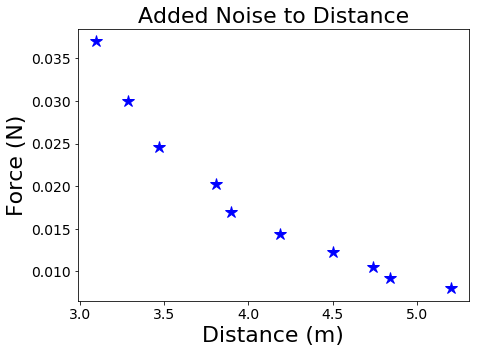

In [5]:
exp_x = exp_x + noise
# Plot same as before
my_fun_plot_function('Added Noise to Distance')

Now let's add some noise to the Force.

In [6]:
noise2 = 0.005*np.random.random(10)
print(noise2)

[0.00394542 0.00149437 0.00138117 0.00471388 0.00025999 0.00052943
 0.00116658 0.00295482 0.00148166 0.00037348]


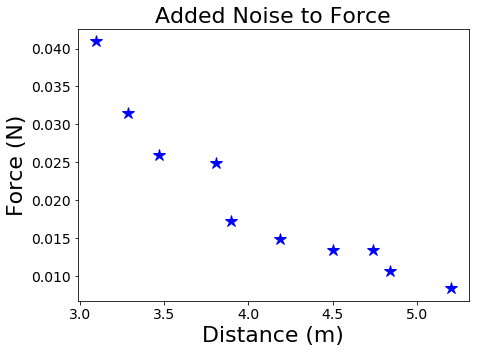

In [7]:
exp_F = exp_F + noise2
# Plot same as before
my_fun_plot_function('Added Noise to Force')

Now we can fit this data to the theoretical equation using SciPy's curve fit function.

In [8]:
from scipy.optimize import curve_fit
def theoretical_form(r, a):
    return (1/(r**a))

a, covariance = curve_fit(theoretical_form, exp_x, exp_F)
a = np.round(a,2)
print('The "a" parameter was determined to be: {} by the fit'.format(a[0]))

The "a" parameter was determined to be: 2.87 by the fit


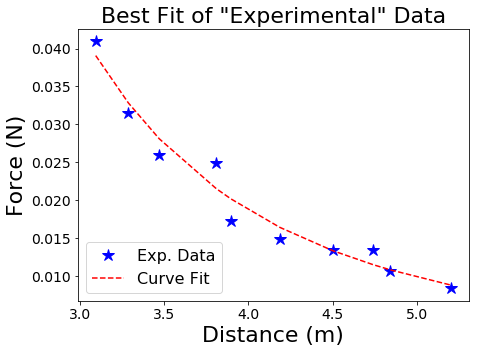

In [9]:
# Plot same as before
my_fun_plot_function('Best Fit of "Experimental" Data')

new_F = theoretical_form(exp_x, a)
z = plt.plot(exp_x, new_F, 'r--', label='Curve Fit');
plt.legend(fontsize='16', loc='lower left');

Unfortunately the "curve_fit" function doesn't calculate R-squared, so we'll have to write our own.
Citation: https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit

In [10]:
F_mean = np.mean(exp_F)
ss_tot = np.sum((exp_F - F_mean)**2)
ss_res = np.sum((exp_F - new_F)**2)
# print(F_mean, ss_tot, ss_res)
R_squared = 1 - ss_res/ss_tot
R_squared = np.round(R_squared, 2)
print('R_squared is :{}'.format(R_squared))

R_squared is :0.96


Now, we can add it along with the equation to our graph.

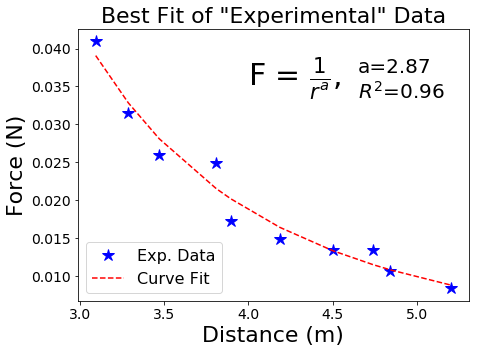

In [11]:
# Plot same as before
my_fun_plot_function('Best Fit of "Experimental" Data')

new_F = theoretical_form(exp_x, a)
z = plt.plot(exp_x, new_F, 'r--', label='Curve Fit');
plt.legend(fontsize='16', loc='lower left');

# NEW...
plt.text(4, 0.035, 'F = $\\frac{1}{r^a}$,', fontsize=30);
plt.text(4.65, 0.0335, f'a={a[0]}\n$R^2$={R_squared}', fontsize=20);

# The END